<font size="4"><b>AIM</b></font>
<br>To predict which customers are more likely to churn and which doesn't. 
<br>Also, to predict the features that are most related to the target variable, churn. 
<br><br>
<font size="4"><b>WHY</b></font><br>It is important for the service providers to predict when the customers will leave and why, to devise solutions accordingly. 
<br><br> 
<font size="4"><b>Variables used in the models</b></font><br>
      Target variable: churn (shown in the column of Customer Status)
      <br>Features: all columns except for the target
      <br><br>
      <font size="4"><b>A brief description of the dataset used</b></font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('Telco_customer_churn_services.csv')

An overview of the data to see the type of the values in each column
<br> Only numerical data values can be used for the models below

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
Customer ID                          7043 non-null object
Count                                7043 non-null int64
Quarter                              7043 non-null object
Referred a Friend                    7043 non-null object
Number of Referrals                  7043 non-null int64
Tenure in Months                     7043 non-null int64
Offer                                7043 non-null object
Phone Service                        7043 non-null object
Avg Monthly Long Distance Charges    7043 non-null float64
Multiple Lines                       7043 non-null object
Internet Service                     7043 non-null object
Internet Type                        7043 non-null object
Avg Monthly GB Download              7043 non-null int64
Online Security                      7043 non-null object
Online Backup                        7043 non-null object
Device Protection Plan    

In [4]:
# check if there is any null values
df.isnull().values.any()

False

Classify the data in the column of 'customer status' into two categories to create binary data<br>
Take both 'joined' and 'stayed' as not churned, labeled as 1<br>
Label 'churned' as 0

In [5]:
df.replace({"Churned": 0, "Joined": 1, "Stayed": 1}, inplace=True)
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,0
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,0
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,0
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,0
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,0


Using label encoder for other categorical data to convert the data into numerical data so that the models can be built from these data.

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_feature_mask = df.dtypes==object

categorical_cols = df.columns[categorical_feature_mask].tolist()

df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,6207,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
1,5305,0,1,5,1,1,1,2,0,1,0,0,0,0,0,1,0,1,1
2,1129,0,0,4,1,1,1,2,0,0,0,0,1,1,1,1,0,1,0
3,3208,0,1,3,1,0,1,2,0,1,1,0,1,1,0,1,0,1,0
4,3419,0,1,3,1,1,1,2,0,0,0,0,0,0,0,1,0,1,0
5,3079,0,0,3,1,1,1,2,0,0,1,0,0,0,0,0,0,1,0
6,262,0,1,5,1,0,1,2,0,0,0,0,0,0,0,1,0,1,2
7,2406,0,1,2,0,0,1,1,0,1,1,0,0,1,0,1,0,1,0
8,1818,0,0,4,1,1,1,2,0,0,0,0,0,0,0,1,0,1,2
9,1398,0,0,5,1,0,1,2,1,0,0,0,0,0,0,0,0,0,0


All data types have been successfully changed to numerical data types - int and float

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
Customer ID                          7043 non-null int32
Count                                7043 non-null int64
Quarter                              7043 non-null int32
Referred a Friend                    7043 non-null int32
Number of Referrals                  7043 non-null int64
Tenure in Months                     7043 non-null int64
Offer                                7043 non-null int32
Phone Service                        7043 non-null int32
Avg Monthly Long Distance Charges    7043 non-null float64
Multiple Lines                       7043 non-null int32
Internet Service                     7043 non-null int32
Internet Type                        7043 non-null int32
Avg Monthly GB Download              7043 non-null int64
Online Security                      7043 non-null int32
Online Backup                        7043 non-null int32
Device Protection Plan              

Dropping unrelated columns of data

In [8]:
df.drop(['Customer ID'], axis=1, inplace=True)

Visualizing the relationship between the variables (correlation) by using a heat map.
<br> The darker the color, the stronger the relationship.
<br> This is to check if any variables strongly related with each other to avoid multicollinearity

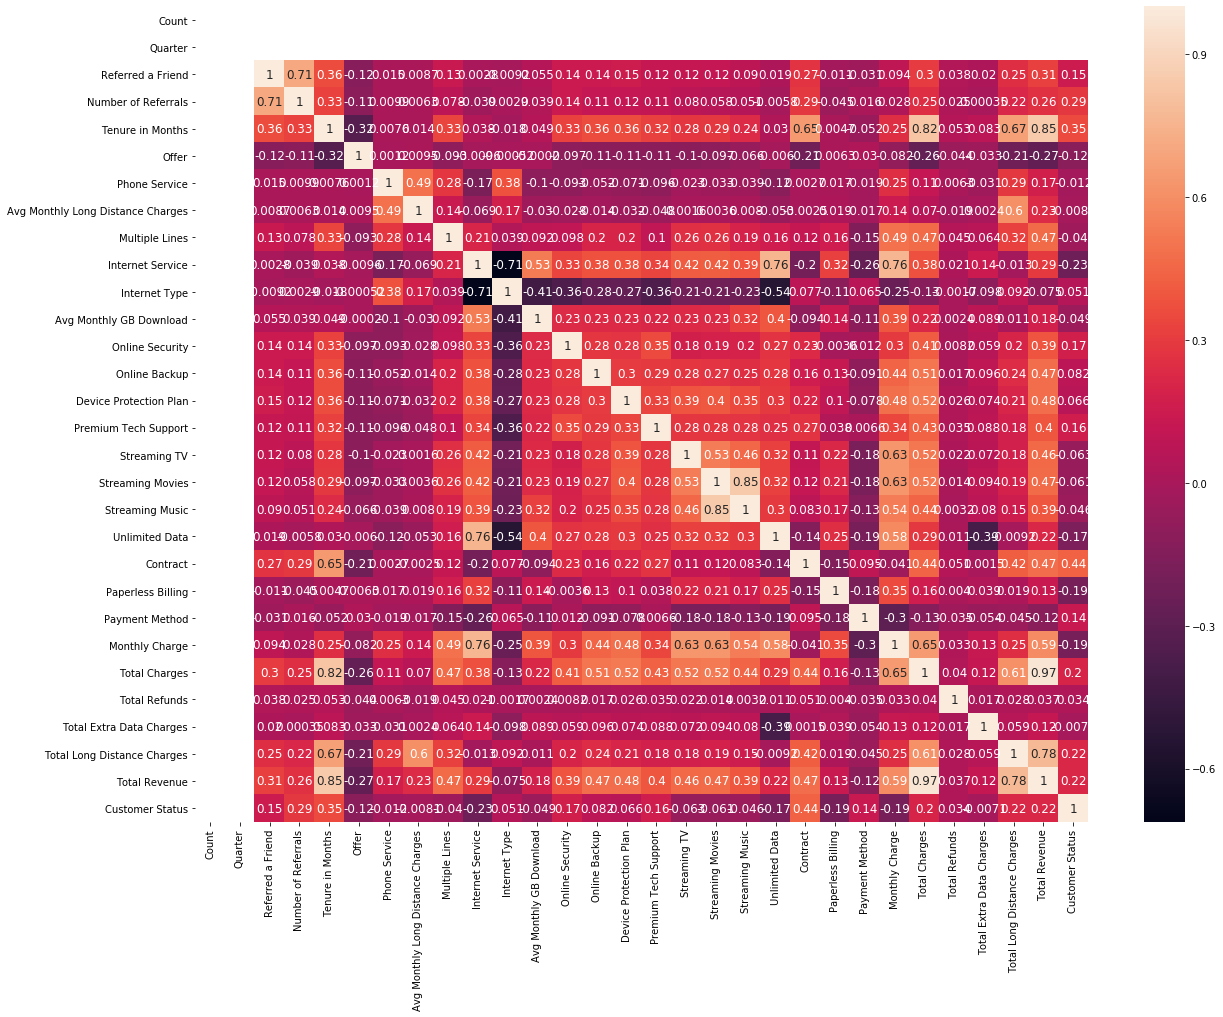

In [9]:
# correlation plot
# get the correlation matrix
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<font size="4"><b> MODEL 1 -- LOGISTIC REGRESSION </b></font>
<br> - supervised learning

In [10]:
from sklearn.model_selection import train_test_split
X=df.drop(['Customer Status'], axis=1)
y=df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

pred_train = model.predict(X_train) 
pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score, mean_squared_error

print("Train Accuracy: ", accuracy_score(y_train, pred_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_test))

acc = accuracy_score(y_test, pred_test)
print('Accuracy Score: ', acc)

MSE = mean_squared_error(y_test, pred_test) 
print("MSE: ", MSE)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy:  0.8306709265175719
Test Accuracy:  0.8261178140525195
Accuracy Score:  0.8261178140525195
MSE:  0.17388218594748048


In [11]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       400
           1       0.87      0.89      0.88      1009

    accuracy                           0.83      1409
   macro avg       0.79      0.78      0.78      1409
weighted avg       0.82      0.83      0.82      1409



<font size="4"><b>The model successfully predict the customers that churn correctly 80% of the time. </b></font>
<br><br>
<b>To acess the model accuracy of logistic regression model: </b>
<br>Mean squared error of the regression is calculated. 
<br>The value produced is not very significant

In [12]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Contract                             1.252950
Phone Service                        0.606191
Online Security                      0.570124
Premium Tech Support                 0.557687
Number of Referrals                  0.526942
Online Backup                        0.291506
Internet Type                        0.266460
Count                                0.196374
Device Protection Plan               0.174094
Payment Method                       0.092653
Tenure in Months                     0.046995
Streaming Music                      0.024002
Avg Monthly GB Download              0.008927
Total Refunds                        0.008055
Streaming TV                         0.003912
Avg Monthly Long Distance Charges    0.002675
Total Long Distance Charges          0.002255
Total Charges                        0.001911
Total Extra Data Charges             0.001685
Quarter                              0.000000
Total Revenue                       -0.002203
Offer                             

By setting the coefficient as zero and sorting the results in order, we can also determine which features contribute the most to our predictions. <br>
A positive relation means that the feature has a positive impact on the predicting variable, which means a customer with that specific feature is more likely to churn. <i> And vice versa. </i>

<b> Interpretations </b>
<br>
Among the factors, Contract, Phone Service, Online Security, Premium Tech Support, Number of Referrals, Online Backup and Internet Type are the top few factors. <br>
This information is important as we are able to look into these categories and see why the customers leave, and the company could devise strategies accordingly.


<font size="4"><b> MODEL 2 -- Decision tree </b></font> <br>
-- imrove the normal decision tree model by finding the best depth first and using the value

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

best_depth = 1
best_accuracy = 0 
for k in range(1,100):
    model=tree.DecisionTreeClassifier(max_depth=k)
    model.fit(X_train, y_train)
    dtree_pred_test = model.predict(X_test)
    if accuracy_score(y_test, dtree_pred_test) > best_accuracy:
       best_accuracy = accuracy_score(y_test, dtree_pred_test)
       best_depth = k + 1
    
best_depth

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
model2=tree.DecisionTreeClassifier(max_depth=best_depth)

model2.fit(X_train2,y_train2)


pred_test2 = model.predict(X_test2)

print(accuracy_score(y_test2, pred_test2))

0.7750177430801988


<font size="4"><b>The model successfully predict the customers that churn  77% of the time. </b></font>

In [14]:
print(classification_report(y_test2,pred_test2))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       400
           1       0.84      0.85      0.84      1009

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.77      0.78      0.77      1409



<font size="4"><b> MODEL 3 -- RANDOM FOREST </b></font> 
<br> -- supervised learning

In [15]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=200, random_state=0)

model3.fit(X_train3,y_train3)

pred_test3 = model.predict(X_test3)

print(accuracy_score(y_test3, pred_test3))

0.7750177430801988


In [16]:
print(classification_report(y_test3,pred_test3))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       400
           1       0.84      0.85      0.84      1009

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.77      0.78      0.77      1409



<font size="4"><b>The model successfully predict the customers that churn correctly 77% of the time. </b></font>

Using feature_importances from sklearn, we can evaluate the importance of the features in the classification task.

In [17]:
important_features = pd.Series(model3.feature_importances_, index=X.columns)
important_features

Count                                0.000000
Quarter                              0.000000
Referred a Friend                    0.012792
Number of Referrals                  0.068659
Tenure in Months                     0.084327
Offer                                0.021378
Phone Service                        0.002426
Avg Monthly Long Distance Charges    0.064934
Multiple Lines                       0.011446
Internet Service                     0.013645
Internet Type                        0.031771
Avg Monthly GB Download              0.072528
Online Security                      0.015716
Online Backup                        0.011036
Device Protection Plan               0.009050
Premium Tech Support                 0.015998
Streaming TV                         0.010060
Streaming Movies                     0.009723
Streaming Music                      0.011073
Unlimited Data                       0.009482
Contract                             0.101863
Paperless Billing                 

<font size="4"><b>MODEL 4 -- KNN Classifier </b></font>

In [18]:
from sklearn.neighbors import KNeighborsClassifier

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

model.fit(X_train4, y_train4)

pred_test4 = model.predict(X_test4)

print(accuracy_score(y_test4, pred_test4))


0.7317246273953159


In [19]:
print(classification_report(y_test4,pred_test4))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45       400
           1       0.78      0.87      0.82      1009

    accuracy                           0.73      1409
   macro avg       0.66      0.63      0.64      1409
weighted avg       0.71      0.73      0.72      1409



<font size="4"><b>Accessing model accuracy: </b></font>
<br> Confusion matrix for the classifier models 

In [20]:
print("Decision tree :")
print(metrics.confusion_matrix(y_test2, pred_test2))
print("Random Forest :")
print(metrics.confusion_matrix(y_test3, pred_test3))
print("KNN :")
print(metrics.confusion_matrix(y_test4, pred_test4))

Decision tree :
[[233 167]
 [150 859]]
Random Forest :
[[233 167]
 [150 859]]
KNN :
[[157 243]
 [135 874]]


<font size="4"><b>Improving the model</b></font>

<b>Plotting a pie chart to examine the percentage of the churned customers and those who didn't </b>
<br>
-- to see if the data is balanced 
<br>
-- to see which is the majority and which is the minority

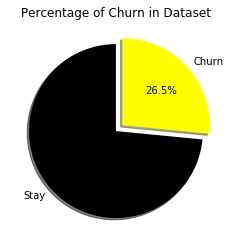

In [21]:
sizes = df['Customer Status'].value_counts(sort = True)
colors = ["black","yellow"] 
explode = (0,0.1)

plt.pie(sizes, explode=explode, labels=['Stay', 'Churn'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Churn in Dataset')

plt.show()

 <b>Interpretation: </b> <br>
 The data is not significantly imbalanced but the model can be improved if a more balanced data is used

The data is imbalanced, therefore the data could well predict customers who churn but not so well for customers who stay
<br>
<b>Solution: Balancing the data by upsampling the minority class 'stay':</b> <br>

In [22]:
from sklearn.utils import resample

#stayed
data_majority = df[df['Customer Status']==1]
print(len(data_majority))
#churned
data_minority = df[df['Customer Status']==0]
print(len(data_minority))

data_minority_upsampled = resample(data_minority, replace=True, n_samples=5174, random_state=1) 

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Customer Status'].value_counts()

5174
1869


1    5174
0    5174
Name: Customer Status, dtype: int64

In [23]:
# Using the new balanced data
# Logistic Regression
from sklearn.model_selection import train_test_split
X=df.drop(['Customer Status'], axis=1)
y=df['Customer Status']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train5, y_train5)

pred_train5 = model.predict(X_train5) 
pred_test5 = model.predict(X_test5)

from sklearn.metrics import accuracy_score, mean_squared_error
acc = accuracy_score(y_test5, pred_test5)
print('Accuracy Score: ', acc)

MSE = mean_squared_error(y_test5, pred_test5) 
print("MSE: ", MSE)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score:  0.8261178140525195
MSE:  0.17388218594748048


In [24]:
print(classification_report(y_test5,pred_test5))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       400
           1       0.87      0.89      0.88      1009

    accuracy                           0.83      1409
   macro avg       0.79      0.78      0.78      1409
weighted avg       0.82      0.83      0.82      1409



<font size="4"><b>Interpretation and Conclusion </b></font>

Logistic regression model scores the highest for accuracy, precision and recall, three metrics chosen for the evaluation of models in this case. <br><br>
This means that it is the model that can predict churned customers correctly the most number of times(high accuracy), predicting the correct ones (high precision) and has the highest ability to find all the positive samples (high recall score).
Balancing the model did not produce very visible differences. <br><br>This can also mean that the data is not significantly imbalanced and the original decision of proceeding without totally balancing the data is preferred in this case.